In [72]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load and Description about the column

In [73]:
url = "https://drive.google.com/uc?export=download&id=1-75NM4Jf-SvpCuVKhLDfbk8jHNdl3aEA"
df = pd.read_csv(url)
df.head()

,Ad set budget,Attribution setting,Results,Result indicator,Reach,Impressions,Cost per results,Amount spent (USD),Reporting starts,Reporting ends,campaign_type,budget($),duration(days),content
0,Using_ad_set_budget,7day_click/1_day_view,294,post_engagement,3356,3463,0.005816,1.71,2024-03-01,2024-03-31,Engagement,10,4,Post: Elevate your hair game with Schwarzkopf...
1,Using_ad_set_budget,7day_click/1_day_view,25597,reach,25597,25597,0.031644,0.81,2024-03-01,2024-03-31,Reach,5,4,Post : Elevate your hair game with Schwarzkop...
2,Using_ad_set_budget,7day_click/1_day_view,99,link_click,6241,6576,0.008283,0.82,2024-03-01,2024-03-31,More Visitor,5,4,Post : Elevate your hair game with Schwarzkop...
3,Using_ad_set_budget,7day_click/1_day_view,359,post_engagement,5266,5849,0.004652,1.67,2024-03-01,2024-03-31,Engagement,10,4,Post : Coca-Cola Light is now available at Wh...
4,Using_ad_set_budget,7day_click/1_day_view,23067,reach,23067,23703,0.033815,0.78,2024-03-01,2024-03-31,Reach,5,4,Post: Coca-Cola Light is now available at Who...


In [74]:
 df.columns.tolist()

['Ad set budget',
 'Attribution setting',
 'Results',
 'Result indicator',
 'Reach',
 'Impressions',
 'Cost per results',
 'Amount spent (USD)',
 'Reporting starts',
 'Reporting ends',
 'campaign_type',
 'budget($)',
 'duration(days)',
 'content']

**Results:** Number of desired outcomes generated by the ads, such as purchases, sign-ups, or clicks.

**Result indicator:** Outcome of the ads, such as whether the results meet a certain target.

**Reach:** Total number of unique users who have been exposed to the ads.

**Impressions:** Total number of times the ads have been displayed to users.

**Cost per results:** The average cost incurred to achieve each desired outcome or conversion.

**Amount spent (USD):** Total amount of money spent on the ads, measured in US dollars.

**Reporting starts:** The start date of the reporting period for the data in the dataset.

**Reporting ends:** End date of the reporting period for the data in the dataset.

**campaign_type:** Type of the advertising campaign, such as awareness, conversion.

**budget($):** Total budget allocated to the advertising campaign, measured in US dollars.

**duration(days):** Duration of the advertising campaign in days.

# Analysis part:

In [76]:
import plotly.express as px

fig = px.pie(df, values='Reach', names='Result indicator',
             title='Reach by Result Indicator <br><span style="font-size:10px">"Reach" is the most significant metric at 62.8%, with "Post Engagement" being the second highest at 12.1%,suggesting a strong overall' +
                   '<br>  audience reach but lower engagement and interaction rates in other areas.</span>',
             labels={'Result indicator': 'Result Indicator', 'Reach': 'Reach'},
             hover_name='Result indicator',
             hole=0.3)

# Change the theme to dark
fig.update_layout(template="plotly_white")

# Adjust the figure size
fig.update_layout(width=800, height=700)

# Adjust the legend font size
fig.update_layout(legend=dict(font=dict(size=12)))
# Add customdata for hover text

fig.update_traces(textinfo='label+percent',textfont=dict(size=11,family="Arial Black"))
fig.show()


# "Result indicator" section with groupby and multiple chart

In [77]:
# Aggregate data by summing 'Reach' for each 'Result Indicator'
df_aggregated = df.groupby('Result indicator', as_index=False).agg({'Reach': 'sum'})

# Convert the 'Reach' values to thousands (K) for display
df_aggregated['Reach'] = df_aggregated['Reach'] / 1000

# Calculate the total sum of Reach
total_reach = df_aggregated['Reach'].sum()

# Create the bar chart with values shown in thousands (K) on the bars
fig = px.bar(df_aggregated, x='Result indicator', y='Reach',
             title='Total Reach by Result Indicator (in K)',
             labels={'Result Indicator': 'Result Indicator', 'Reach': 'Total Reach (K)'},
             template='plotly_white',
             text='Reach')  # Add text labels to bars

# Update layout settings
fig.update_layout(
    xaxis=dict(title='Result Indicator'),
    yaxis=dict(title='Total Reach (K)'),
    barmode='group',  # Group bars if needed (omit if not needed)
)

# Adjust text settings
fig.update_traces(texttemplate='%{text:.1f} K', textfont_size=12, textposition='outside')

# Show the figure
fig.show()

#bar witdth

# indivdual graph

In [78]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Define the campaign types
campaign_types = [
    'Engagement', 'Reach', 'More Visitor', 'Message', 'Msg', 'Agency',
    'Educational institution', 'Real Estate', 'Travel Agency', 'Automobile',
    'Fashion Brand', 'Fast food industry', 'leather industry', 'Leather Bros',
    'Educator Study', 'Ranch Bistro'
]

# Determine the number of rows and columns for the subplot grid
num_rows = 4  # Adjust this as needed
num_cols = 4  # Adjust this as needed

# Create a color palette
colors = px.colors.qualitative.Set3  # Using a predefined color set

# Create a subplot figure with a grid layout
fig = make_subplots(rows=num_rows, cols=num_cols,
                    subplot_titles=campaign_types,  # Add titles to each subplot
                    horizontal_spacing=0.05, vertical_spacing=0.1)  # Adjust spacing as needed

# Loop through each campaign type and generate a bar chart in the subplot grid
for i, campaign in enumerate(campaign_types):
    # Filter the DataFrame for the current campaign type
    df_filtered = df[df['campaign_type'] == campaign]

    # Calculate counts of 'Result indicator'
    result_counts = df_filtered['Result indicator'].value_counts()

    # Create the bar chart for the filtered DataFrame with text labels inside the bars
    bar_chart = go.Bar(
        x=result_counts.index,
        y=result_counts.values,
        name=campaign,
        marker=dict(color=colors[i % len(colors)]),  # Cycle through the color palette
        text=result_counts.values,  # Show the counts on the bars
        textposition='inside',  # Position the text inside the bars
        textfont=dict(color='black')  # Set the text color to black
    )

    # Determine the row and column for the current subplot
    row = i // num_cols + 1
    col = i % num_cols + 1

    # Add the bar chart to the appropriate subplot
    fig.add_trace(bar_chart, row=row, col=col)

# Update layout settings
fig.update_layout(
    height=900,
    width=1200,
    title_text="Distribution of Result Indicators by Campaign Type",
    showlegend=False,
    template='plotly_white'  # Use the white theme
)

# Show the figure
fig.show()

In [79]:
import pandas as pd
import plotly.express as px

# Define your custom order
custom_order = [
    "Engagement", "Real Estate","Reach",
    "Educational institution",
    "Message", "More Visitor",
    "Educator Study", "Ranch Bistro",
    "Fashion Brand", "Fast food industry" "Automobile", "Travel Agency",
    "Msg","Leather Bros", "Agency", "leather industry",
]

# Convert 'campaign_type' to categorical with custom order
df['campaign_type'] = pd.Categorical(df['campaign_type'], categories=custom_order)

# Sort the DataFrame by 'campaign_type' and then by 'budget($)'
df_sorted = df.sort_values(by=['campaign_type', 'budget($)'], ascending=True)

# Create the bar chart
fig = px.histogram(df_sorted,
                   y='campaign_type',
                   x='budget($)',
                   title='Budget Allocation by Campaign Type<br><span style="font-size:10px">"Engagement" dominating at 565, "Real Estate" at 495, "Educational institution" at 135, "More Visitor" at 120, "Ranch Bistro" at 60, and "Fashion Brand" at 55, reflecting varying investment intensities across different <br> campaign types.</span>',
                   labels={'campaign_type': 'Campaign Type', 'budget($)': 'Budget ($)'},
                   text_auto=True)

# Update the layout to change the theme
fig.update_layout(template='plotly_white')

# Show the figure
fig.show()


In [80]:
# Define specific small percentage categories to remove
small_categories = ["Ranch Bistro", "leather industry", "Agency", "Leather Bros", "Educator Study", "Travel Agency"]
df['campaign_type']
# Filter out these categories from the DataFrame
df_filtered = df[~df['campaign_type'].isin(small_categories)]

# Create the pie chart with the filtered DataFrame
fig = px.pie(df_filtered, values='duration(days)', names='campaign_type',
             title='Campaign Duration Distribution Type<br><span style="font-size:10px">"Reach" at 23.1%, "Engagement" at 22.8%, "Message" at 11.3%, "Real Estate" at 10.4%, "More Visitor" at 10.3%, and smaller contributions from <br>other campaign types, highlighting a focus on reach and engagement.</span>',
             hole=0.4)

# Change the theme to dark (uncomment to apply)
# fig.update_layout(template="plotly_dark")

# Adjust the figure size
fig.update_layout(width=1000, height=700)

# Adjust the legend font size
fig.update_layout(legend=dict(font=dict(size=14)))

# Add custom data for hover text
fig.update_traces(textinfo='label+percent', textfont=dict(size=11,family="Arial Black"))

# Show the figure
fig.show()


In [92]:
# Create a pivot table
pivot_df = df.pivot_table(values='Amount spent (USD)', index='campaign_type', columns='duration(days)', aggfunc='sum', fill_value=0)

# Convert the pivot table to a DataFrame and reset the index
pivot_df = pivot_df.reset_index()

# Melt the DataFrame to long format for plotting
melted_df = pivot_df.melt(id_vars='campaign_type', var_name='duration(days)', value_name='Amount spent (USD)')

# Sort the melted DataFrame by 'Amount spent (USD)' in descending order
melted_df_sorted = melted_df.sort_values(by='Amount spent (USD)', ascending=False)

# Create the bar chart
fig = px.histogram(melted_df_sorted, y='campaign_type', x='Amount spent (USD)',
                   color='duration(days)',  # Color by duration
                   title='Amount Spent by Campaign Type and Duration',
                   labels={'campaign_type': 'Campaign Type', 'Amount spent (USD)': 'Amount Spent (USD)', 'duration(days)': 'Duration (Days)'},
                   template="plotly_white",  # Use the white theme
                   text_auto=True)  # Automatically show text on the bars

# Update layout settings to adjust the text appearance
fig.update_traces(textposition='inside', textfont=dict(color='black'))  # Position text inside the bars with black color

# Show the figure
fig.show()


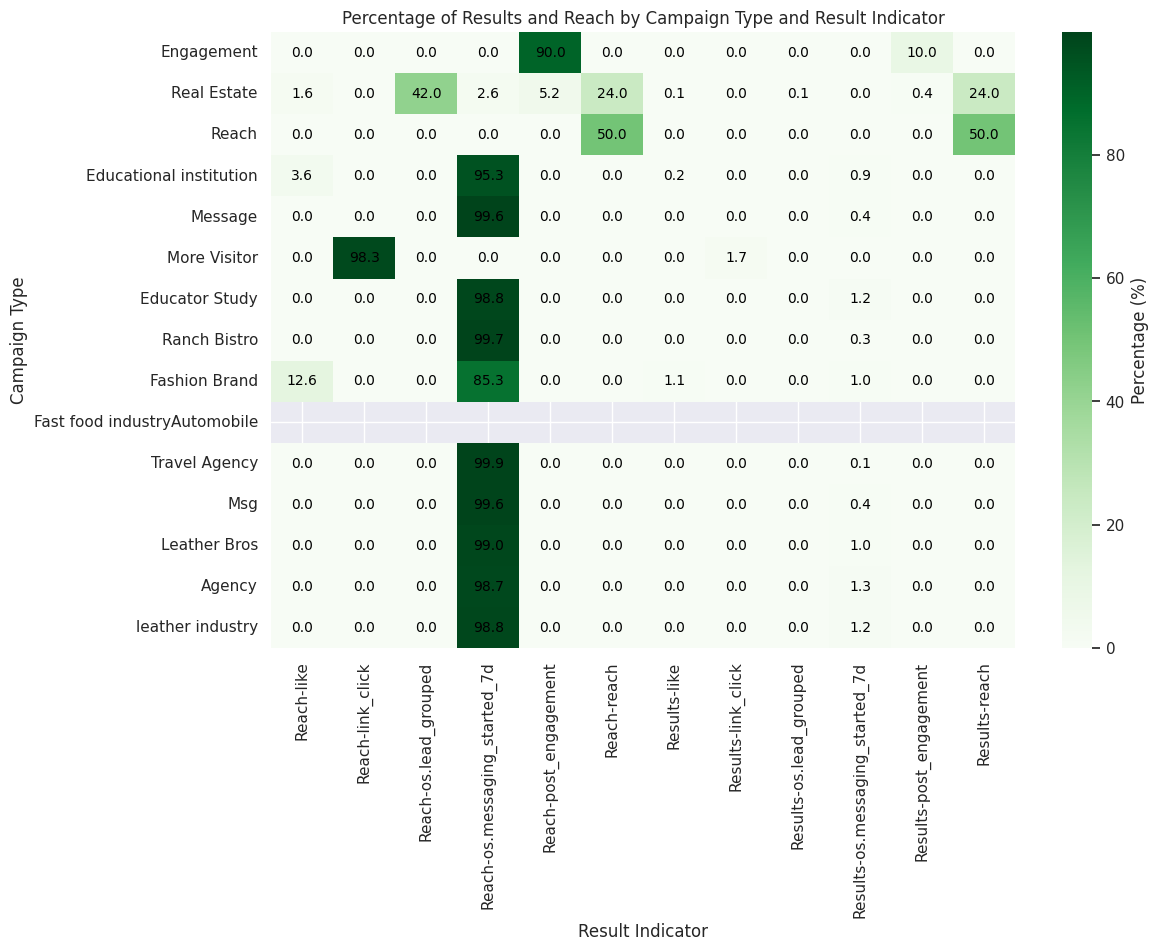

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame
pivot_df = df.pivot_table(index='campaign_type', columns='Result indicator', values=['Results', 'Reach'], aggfunc='sum', fill_value=0)

# Convert values to percentage
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Set up the dark theme using Seaborn and Matplotlib
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')  # Set the style to darkgrid

# Create the heatmap with sea green color map and percentage values
sns.heatmap(pivot_df_percentage, annot=True, fmt='.1f', cmap='Greens',  # Use Greens colormap for sea green tones
            cbar_kws={'label': 'Percentage (%)'},  # Color bar label
            annot_kws={'size': 10, 'color': 'black'})  # Annotation properties

# Set labels and title
plt.title('Percentage of Results and Reach by Campaign Type and Result Indicator')
plt.xlabel('Result Indicator')
plt.ylabel('Campaign Type')

# Show the plot
plt.show()

In [83]:
df_aggregated = df.groupby('campaign_type', as_index=False).agg({'Cost per results': 'sum'})

# Sort the DataFrame by 'Cost per results' in ascending order
df_aggregated = df_aggregated.sort_values(by='Cost per results', ascending=True)

# Create the bar chart using the sorted aggregated data
fig = px.bar(df_aggregated, x='campaign_type', y='Cost per results',
             title='Cost per Result by Campaign Type',
             labels={'campaign_type': 'Campaign Type', 'Cost per results': 'Cost per Result'},
             template='plotly_white',
             text='Cost per results')  # Add text labels to bars

# Update layout settings
fig.update_layout(
    xaxis=dict(title='Campaign Type'),
    yaxis=dict(title='Cost per Result'),
    barmode='group'  # Group bars if needed (omit if not needed)
)

# Adjust text settings
fig.update_traces(texttemplate='%{text:.0f}', textfont_size=12, textposition='outside')

# Show the figure
fig.show()

<ipython-input-83-40c62371396f>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [90]:
import pandas as pd
import plotly.express as px

# Define categories to exclude and group into "Other"
exclude_categories = ['Travel Agency', 'Msg', 'Leather Bros', 'Educator Study', 'Automobile', 'leather industry']

# Filter out the excluded categories
df_filtered = df[~df['campaign_type'].isin(exclude_categories)]

# Sum the excluded categories
other_sum = df[df['campaign_type'].isin(exclude_categories)]['Amount spent (USD)'].sum()

# Create a new DataFrame for the "Other" category
df_other = pd.DataFrame({'campaign_type': ['Other'], 'Amount spent (USD)': [other_sum]})

# Concatenate the filtered DataFrame with the "Other" category
df_filtered = pd.concat([df_filtered, df_other], ignore_index=True)

# Create the pie chart
fig = px.pie(df_filtered, values='Amount spent (USD)', names='campaign_type',
             title='Amount Spent by Campaign Type (USD)',
             labels={'campaign_type': 'Campaign Type', 'Amount spent (USD)': 'Amount Spent (USD)'},
             hole=0.4)  # Optional: adds a hole in the center to create a donut chart effect

# Update layout settings to increase pie chart size relative to its container
fig.update_layout(
    template='plotly_white',  # Change theme if needed
    legend=dict(title='Campaign Type'),
    margin=dict(t=30)  # Adjust margins to give more space
)

fig.update_layout(width=1000, height=700)

# Adjust the legend font size
#fig.update_layout(legend=dict(font=dict(size=14)))
# Adjust text settings
fig.update_traces(textinfo='label+percent', textfont=dict(size=11,family="Arial Black"))

# Show the figure
fig.show()
